Example 2: Extracting data from a logfile and plotting it
==============================================

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #For high resolution png figures on a retina screen macbook

import sys
sys.path.append('/Users/fcarter/Documents/Code/Python/')

import warnings

import glob
import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Import the custom AJA Python logfile code
--------------------------------------

In [2]:
import AJA_tools.recipe_parser as rp
import AJA_tools.logfile_tools as lt

Specify data locations on disk
----------------------------

In [3]:
logs_folder = './AJA_Metals//datalog/'
jobs_dict = rp.build_jobs_dict('./AJA_Metals/jobs/')
recipe_list = rp.build_recipe_list('./AJA_Metals/recipes/')

Build a dictionary containing all the logfile metadata
---------------------------------------------------
This includes things like the filename and the list of specific recipe steps used during that particular sputtering run. Warnings will be issued if the logfile has no corresponding job file.

In [4]:
#Grab all files that end in '.dlg' and add them to a list
logfiles = glob.glob(logs_folder+'*.dlg')

#Iterate through the list and build a dict of logfiles
logs = {}
for logfile in logfiles:
    logs[logfile] = rp.get_recipe(logfile, jobs_dict=jobs_dict, recipe_list=recipe_list)

/Users/fcarter/Documents/Code/Python/AJA_tools/recipe_parser.py:103: RecipeWarning: No matching job found!
  warnings.warn("No matching job found!", RecipeWarning)
/Users/fcarter/Documents/Code/Python/AJA_tools/recipe_parser.py:230: RecipeWarning: Job file not found for: 'CP LU1_3_4_5_6 TES 1&3&4 Ti4+Au_200+30nm 5&6 Ti4+Au+Ti4+Au_5+5+150+20nm 5minRFclean_Wait10min_temp'. Output dict contains None.
  warnings.warn("Job file not found for: "+repr(job_name)+". Output dict contains None.", RecipeWarning)
/Users/fcarter/Documents/Code/Python/AJA_tools/recipe_parser.py:230: RecipeWarning: Job file not found for: 'load-unload1-9'. Output dict contains None.
  warnings.warn("Job file not found for: "+repr(job_name)+". Output dict contains None.", RecipeWarning)
/Users/fcarter/Documents/Code/Python/AJA_tools/recipe_parser.py:230: RecipeWarning: Job file not found for: 'SP LU1_3_4_5_6 Resistor Ti+Au_40+7nm_temp'. Output dict contains None.
  warnings.warn("Job file not found for: "+repr(job_name

Print the 25 most commonly used recipe steps
-----------------------------------------
These individual steps are used to build up jobs, which can consist of many such steps.

In [5]:
#This utility is useful for extracting widely used recipes
recipe_freqs = lt.count_recipes(recipe_list, logs)
pprint.pprint(recipe_freqs[0:25])

[('wait 5min', 3033),
 ('SL Rot Gases OFF', 1280),
 ('SL Au OFF', 689),
 ('SL Rot Gas ON & Strike Ti Plasma', 494),
 ('CP Rot Gas ON  30W Bias Plasma On', 423),
 ('CP Gases OFF 1min', 422),
 ('unload 4', 393),
 ('SL Ti OFF + Au strike', 382),
 ('Load 4', 375),
 ('CP RF Clean 5min', 322),
 ('SL Nb Gun4 OFF', 321),
 ('unload 5', 221),
 ('unload3', 219),
 ('load3', 216),
 ('SL RF Clean + Ti Presputt 3 min', 213),
 ('load 5', 206),
 ('SL Rot Gas ON & Strike Nb Plasma', 161),
 ('SP Rot Gas ON & Strike Ti4+Au', 161),
 ('SP Ti4 OFF + Au sputter 20nm 3_2mTorr', 151),
 ('SL Clean Presputter Nb 3min', 140),
 ('Unload 1', 139),
 ('CP Strike BIas 30W and Nb Plasma 50W', 134),
 ('CP BIas 25W and Increase Nb Power 250W', 131),
 ('SL Au sputter 20nm 3_2mTorr', 129),
 ('CP Clean 5min_Presputter Nb 3min', 127)]


Look at a specific recipe
-----------------------------------------------
First let's loop through all the log files and get the data corresponding to every time this recipe step was run.

In [6]:
recipe_to_plot = 'CP Ti sputter 200nm + Au presputter last 1min'

#Filter out the logfiles that contain the recipe_to_plot, and load the data
#lt.filter_logs loads up the data by default
rlogs = lt.filter_logs(logs, recipe_to_plot)
        
#Grab a list of the column headings (aka keys) from the first file
keys_all = list(rlogs.values())[0]['data'].keys()
print(keys_all)

Index(['Layer #', 'Wafer # Loaded', 'Sub. Rot.', 'C.M. Press.', 'Gas#1 Flow',
       'Gas#2 Flow', 'Gas#3 Flow', 'Sub. Temp.', 'RF#1 W Fbdk', 'RF#1 DC Bias',
       'RF#1 Plasma', 'RF#1 Shutter', 'RF#2 W Fbdk', 'RF#2 DC Bias',
       'RF#2 Plasma', 'RF#2 Shutter', 'DC#1 W Fdbk', 'DC#1 V Fdbk',
       'DC#1 mA Fdbk', 'DC#1 Plasma', 'DC#1 Shutter', 'DC#5A W Fdbk',
       'DC#5A V Fdbk', 'DC#5A mA Fdbk', 'DC#5A Plasma', 'DC#5A Shutter',
       'DC#5B W Fdbk', 'DC#5B V Fdbk', 'DC#5B mA Fdbk', 'DC#5B Plasma',
       'DC#5B Shutter', 'DC#5C W Fdbk', 'DC#5C V Fdbk', 'DC#5C mA Fdbk',
       'DC#5C Plasma', 'DC#5C Shutter', 'DC#5D W Fdbk', 'DC#5D V Fdbk',
       'DC#5D mA Fdbk', 'DC#5D Plasma', 'DC#5D Shutter', 'Dep. Program#',
       'SP1', 'SP2', 'Radak'],
      dtype='object')


Overplot the data from all the times the recipe was run
---------------------------------------------------
Sometimes a run is cancelled before the recipe was able to run. If that is detected, a warning will be issued.

/Users/fcarter/Documents/Code/Python/AJA_tools/logfile_tools.py:600: RecipeWarning: ./AJA_Metals//datalog/CP LU1_3_4_5 TES Ti+Au_200nm+20nm 5minRFclean_Wait5min_1242016_ 90128 PM.dlg aborted early! May not be any data to plot.
  warnings.warn(logfile+" aborted early! May not be any data to plot.", RecipeWarning)
/Users/fcarter/Documents/Code/Python/AJA_tools/logfile_tools.py:600: RecipeWarning: ./AJA_Metals//datalog/CP LU1_3_4_5 TES Ti+Au_200nm+20nm 5minRFclean_Wait5min_1242016_ 94134 PM.dlg aborted early! May not be any data to plot.
  warnings.warn(logfile+" aborted early! May not be any data to plot.", RecipeWarning)
/Users/fcarter/Documents/Code/Python/AJA_tools/logfile_tools.py:600: RecipeWarning: ./AJA_Metals//datalog/CP LU1_3_4_5 TES Ti+Au_200nm+20nm 5minRFclean_Wait5min_1252016_ 102948 AM.dlg aborted early! May not be any data to plot.
  warnings.warn(logfile+" aborted early! May not be any data to plot.", RecipeWarning)
/Users/fcarter/Documents/Code/Python/AJA_tools/logfile_to

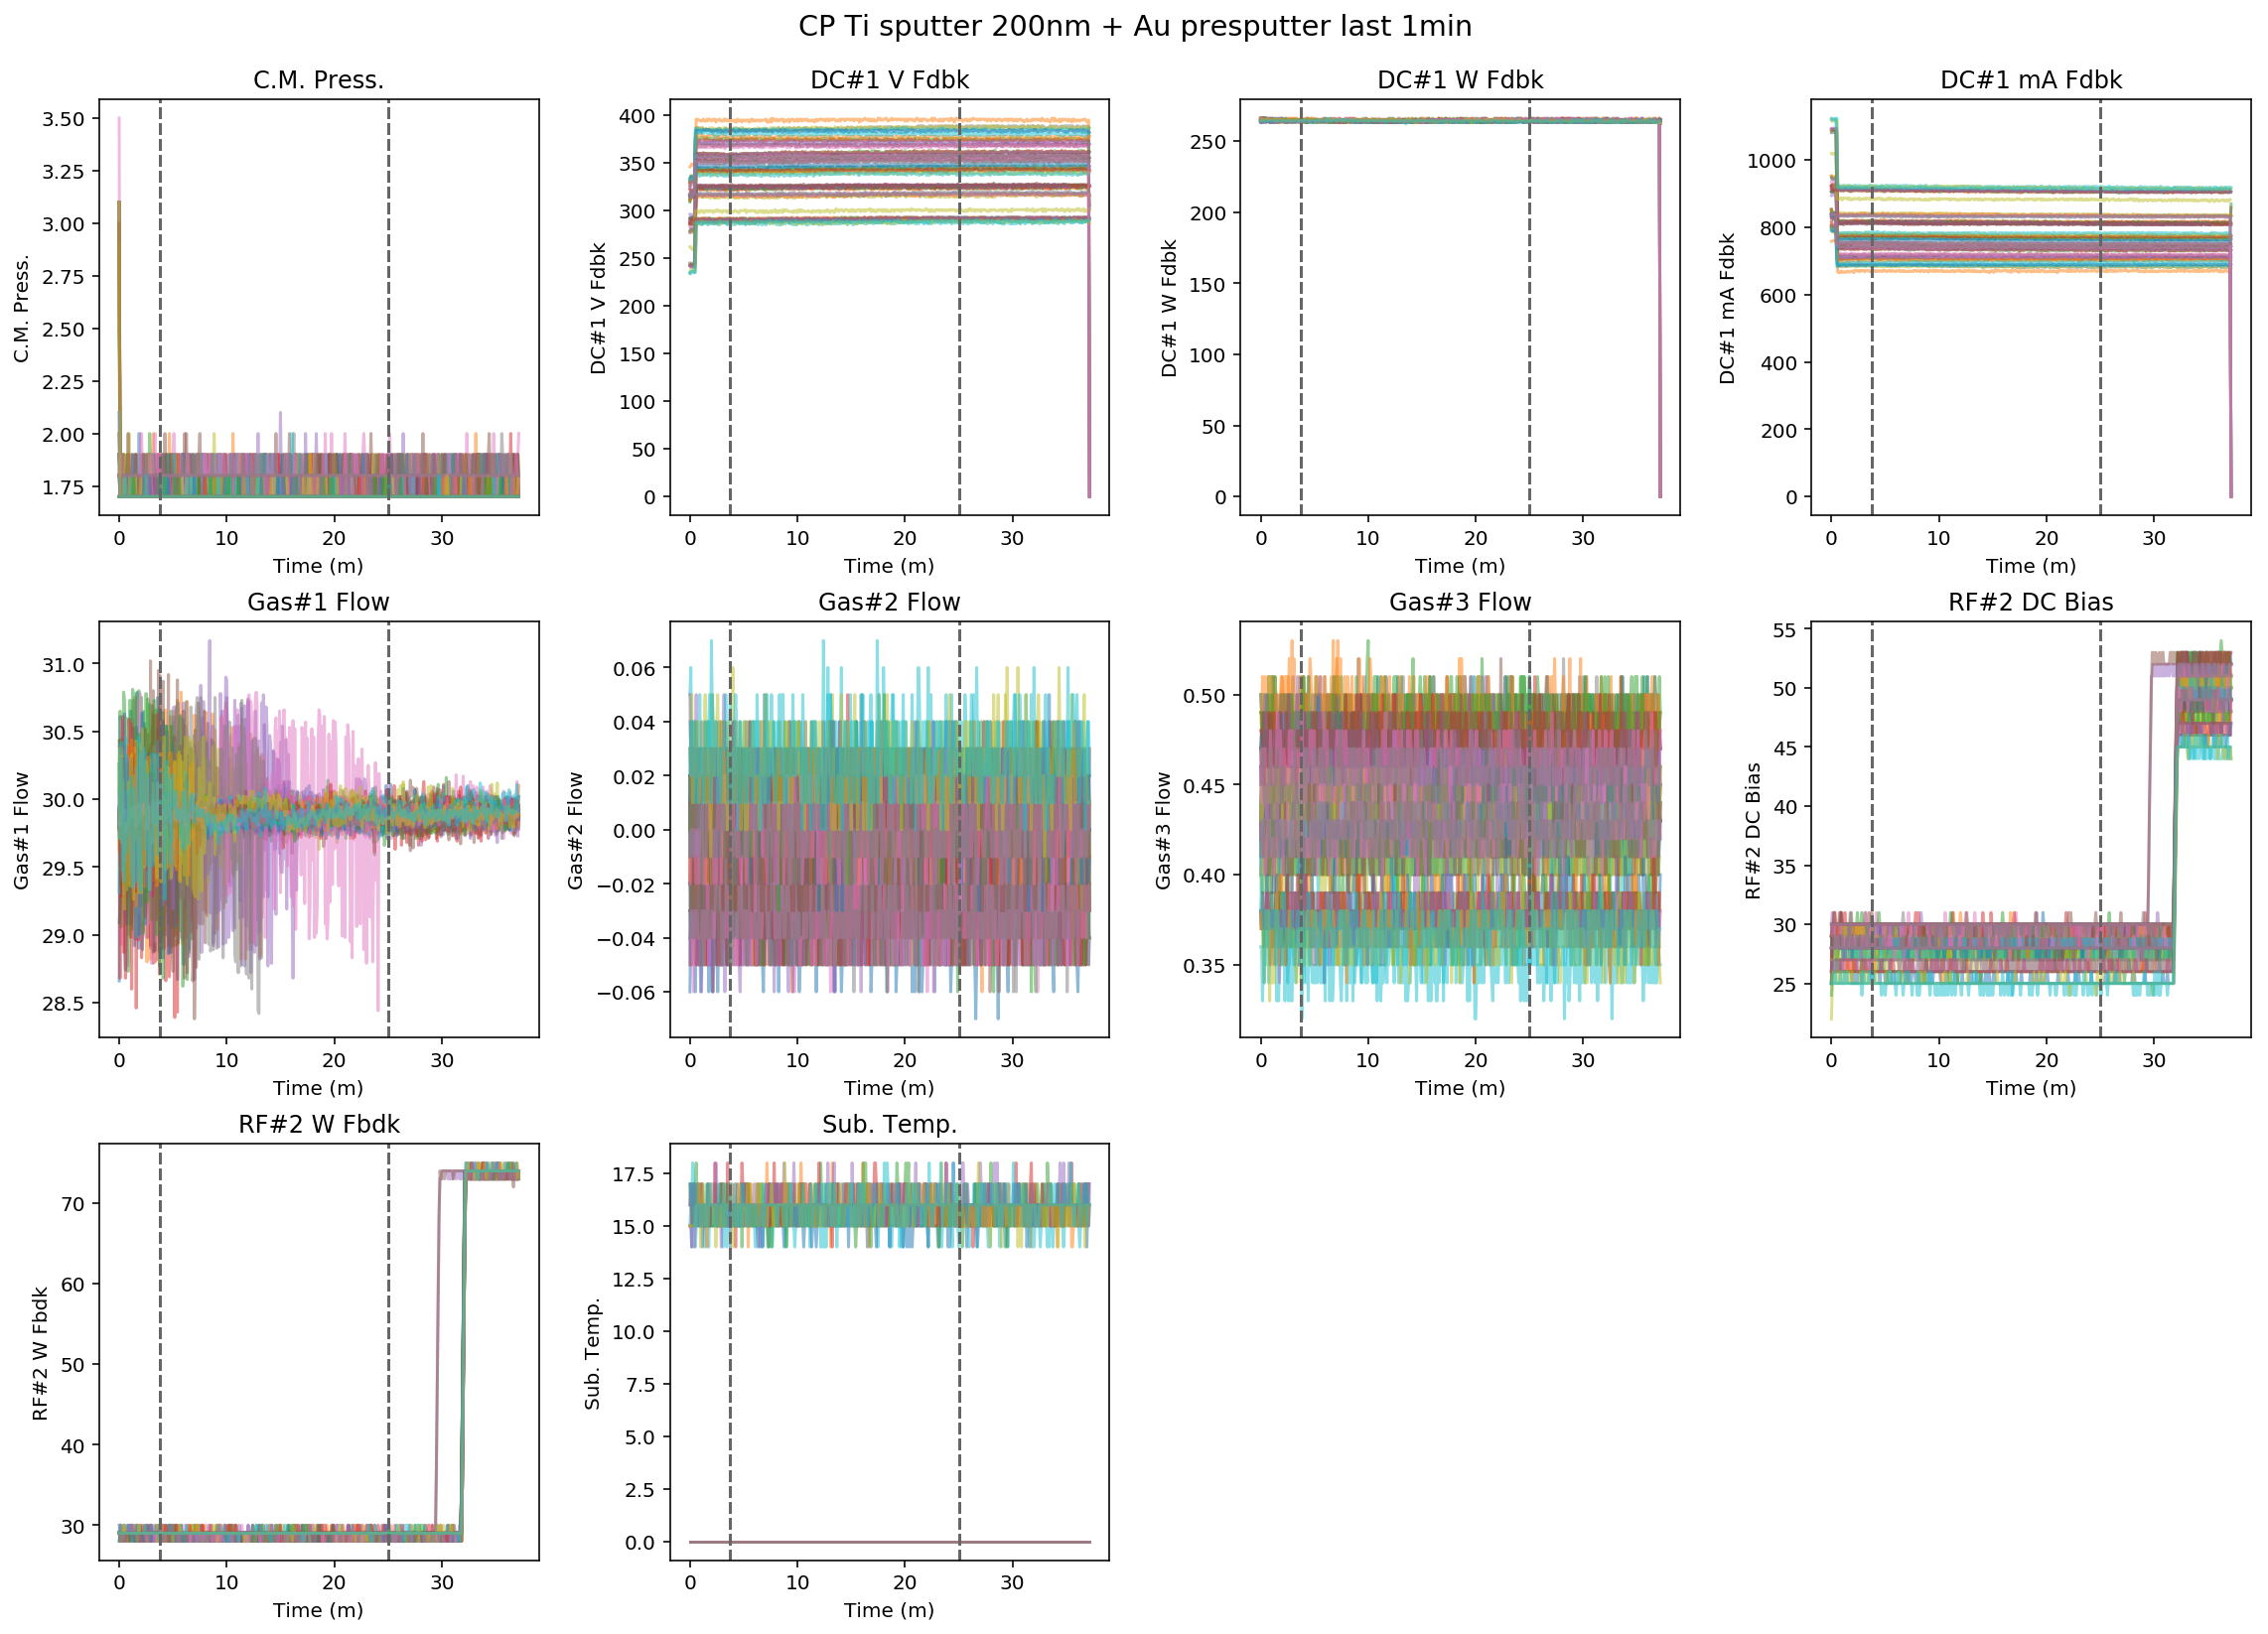

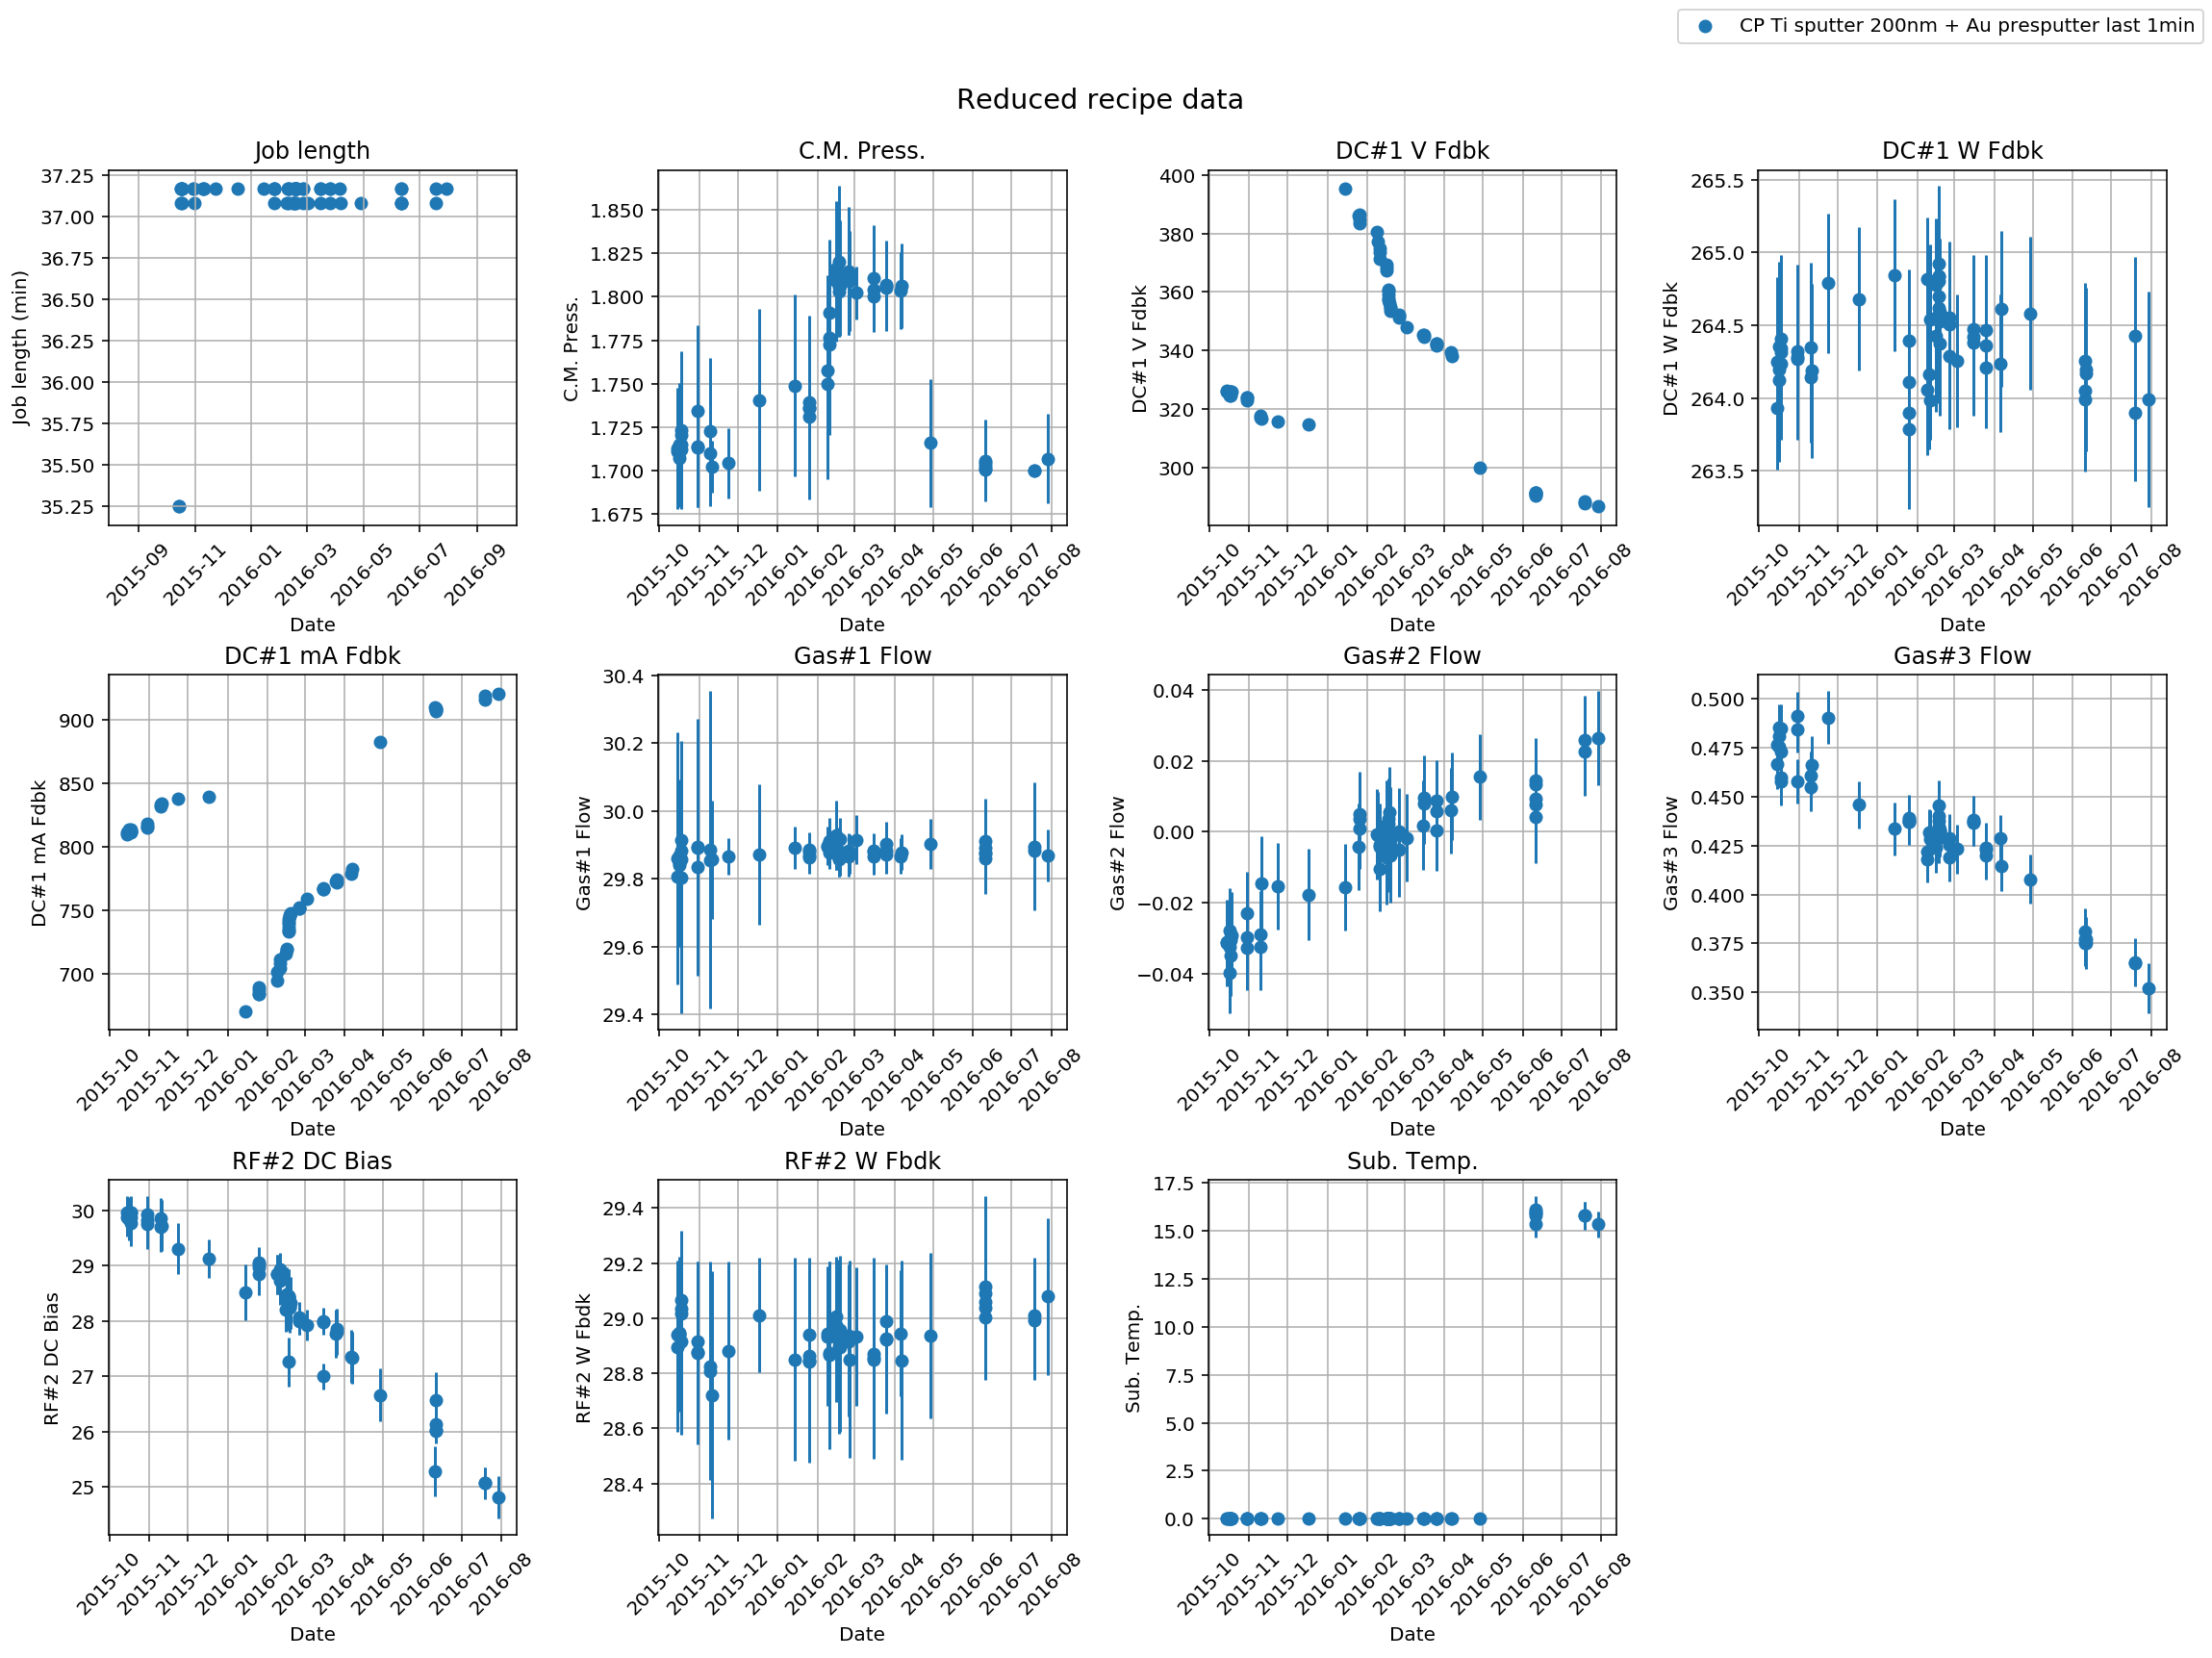

In [7]:
#These guys aren't used in this recipe, so don't plot them
sources_ignore = ['DC#5', 'RF#1']

#This makes the call to overplot the raw time data
lt.overplot_all(rlogs, recipe_to_plot, min_recipe_time = 10, overplot_vlines = [45, 300], sources_to_ignore = sources_ignore)

#Calculate the means/stdevs of the time data
rmeans = lt.get_means(rlogs, recipe_to_plot, min_length = 10, avg_interval=[45, 300], sources_to_ignore = sources_ignore)

#Plot said reduced data
lt.plot_means(rmeans)